<a href="https://colab.research.google.com/github/NataliaKolesnik/Car_Price_prediction/blob/master/1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path_data = '/content/drive/MyDrive/SF_project_8/data/'

##Библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

FONT_TITLE = 25
FONT_LABEL = 15
COLOR  = 'dodgerblue'

## Загругка и осмотр данных

In [ ]:
df_train = pd.read_csv(path_data+'train.csv')
df_test = pd.read_csv(path_data+'test.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6682 entries, 0 to 6681
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              6682 non-null   object 
 1   brand                 6682 non-null   object 
 2   color                 6682 non-null   object 
 3   description           6682 non-null   object 
 4   engineDisplacement    6682 non-null   object 
 5   enginePower           6682 non-null   object 
 6   fuelType              6682 non-null   object 
 7   mileage               6682 non-null   int64  
 8   modelDate             6682 non-null   int64  
 9   model_info            6682 non-null   object 
 10  name                  6682 non-null   object 
 11  numberOfDoors         6682 non-null   int64  
 12  price                 6682 non-null   float64
 13  productionDate        6682 non-null   int64  
 14  sell_id               6682 non-null   int64  
 15  vehicleConfiguration 

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              1671 non-null   object
 1   brand                 1671 non-null   object
 2   color                 1671 non-null   object
 3   description           1671 non-null   object
 4   engineDisplacement    1671 non-null   object
 5   enginePower           1671 non-null   object
 6   fuelType              1671 non-null   object
 7   mileage               1671 non-null   int64 
 8   modelDate             1671 non-null   int64 
 9   model_info            1671 non-null   object
 10  name                  1671 non-null   object
 11  numberOfDoors         1671 non-null   int64 
 12  productionDate        1671 non-null   int64 
 13  sell_id               1671 non-null   int64 
 14  vehicleConfiguration  1671 non-null   object
 15  vehicleTransmission   1671 non-null   

**Наличие пропусков**

In [ ]:
# В обучающей выборке
df_train.isna().sum()

bodyType                   0
brand                      0
color                      0
description                0
engineDisplacement         0
enginePower                0
fuelType                   0
mileage                    0
modelDate                  0
model_info                 0
name                       0
numberOfDoors              0
price                      0
productionDate             0
sell_id                    0
vehicleConfiguration       0
vehicleTransmission        0
Владельцы                  1
Владение                4326
ПТС                        0
Привод                     0
Руль                       0
dtype: int64

In [ ]:
# В тестовой выборке
df_test.isna().sum()

bodyType                   0
brand                      0
color                      0
description                0
engineDisplacement         0
enginePower                0
fuelType                   0
mileage                    0
modelDate                  0
model_info                 0
name                       0
numberOfDoors              0
productionDate             0
sell_id                    0
vehicleConfiguration       0
vehicleTransmission        0
Владельцы                  0
Владение                1092
ПТС                        0
Привод                     0
Руль                       0
dtype: int64

В обучающей выборке 6682 объектов, в тестовой - 1671.

Пропуски содержаться в признаке Владение (порядка 65%). Так же одно пропущенное значение в обучающей выборке в признаке Владельцы.


## **Данные:** 

**bodyType** - тип кузова (категориальный)  
**brand** - марка автомобиля (категориальный)  
**color** - цвет автомобиля (категориальный)             
**description** - текст объявления (текст)   
**engineDisplacement** - объем двигателя (числовой float)  
**enginePower** - двигатель (категориальный)   
**fuelType** - тип топлива (категориальный)   
**mileage** - пробег (числовой int)   
**modelDate** - год начала производства модели (числовой int)   
**model_info** - модель авто (категориальный)  
**name** - краткая информация об авто (текст)  
**numberOfDoors** - количество дверей (числовой int)   
**price** - цена (числовой float) - target   
**productionDate** - год выпуска авто (числовой int)   
**sell_id** - id объявления (числовой int)  
**vehicleConfiguration** - конфигурация автомобиля  
**vehicleTransmission**  - трансмиссия (категориальный)   
**Владельцы** - количество владельцев (категориальный ранговый)   
**Владение** - срок владения (текст)  
**ПТС** - оригинал или дубликат (категориальный)   
**Привод** - тип привода (категориальный)    
**Руль** - с какой стороны (категориальный)            

## Анализ и обработка данных

### bodyType

In [ ]:
df_train['bodyType'].value_counts()

седан                   2843
внедорожник 5 дв.       2315
купе                     427
хэтчбек 5 дв.            296
лифтбек                  245
универсал 5 дв.          153
минивэн                  146
купе-хардтоп              91
родстер                   60
кабриолет                 44
хэтчбек 3 дв.             41
компактвэн                 8
лимузин                    5
внедорожник 3 дв.          3
пикап двойная кабина       2
внедорожник открытый       2
седан 2 дв.                1
Name: bodyType, dtype: int64

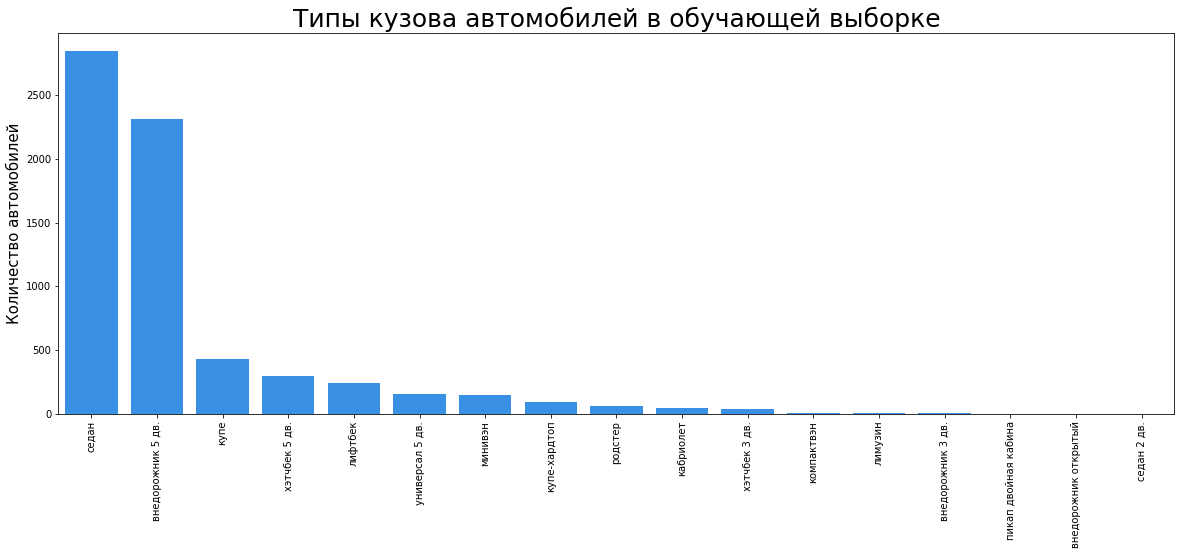

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Типы кузова автомобилей в обучающей выборке', fontsize=FONT_TITLE)
sns.countplot(x='bodyType', data=df_train,  color=COLOR,
              order=df_train['bodyType'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Количество автомобилей', fontsize=FONT_LABEL)
plt.xlabel('')
plt.show()

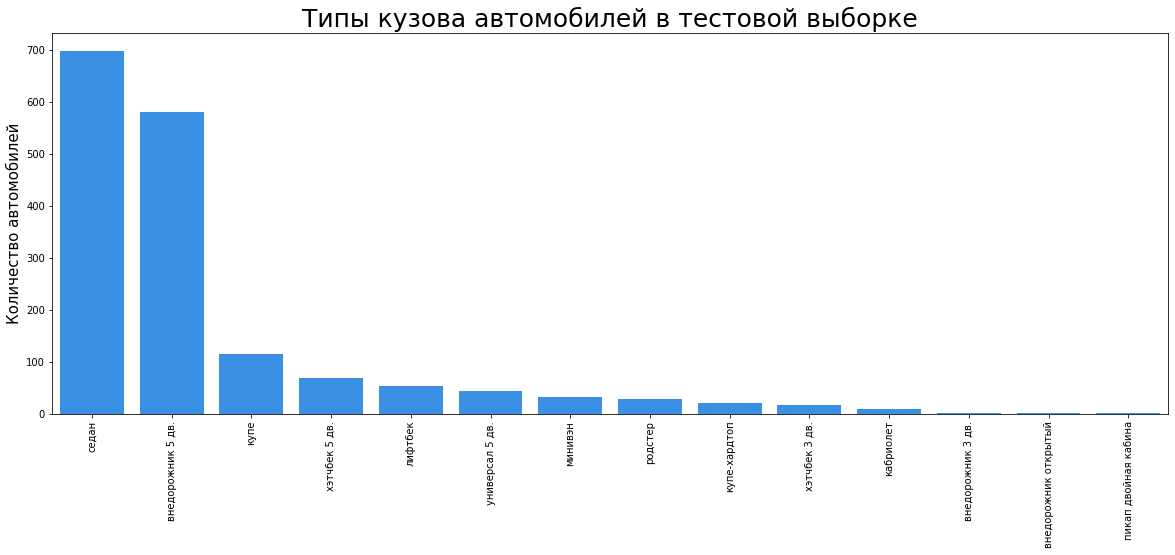

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Типы кузова автомобилей в тестовой выборке', fontsize=FONT_TITLE)
sns.countplot(x='bodyType', data=df_test,  color=COLOR,
              order=df_test['bodyType'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Количество автомобилей', fontsize=FONT_LABEL)
plt.xlabel('')
plt.show()

Типы кузова распределены очень неравномерно. Большинство - седан и внедорожник 5 дверей. Есть смежные, которые отличаются количеством дверей, возможно их лучше бъединить в одну категорию (так как их количество на всю выборку очень мало от 1 до 8).

In [ ]:
def body_type_processing(body_type):
    body_type = re.sub(' \d дв.', '', body_type)
    if 'внедорожник' in body_type or 'пикап' in body_type:
        return 'внедорожник'
    elif 'компактвэн' in body_type:
        return 'минивэн'
    else:
        return body_type

df_train['bodyType'] = df_train['bodyType'].apply(lambda s: body_type_processing(s))
df_test['bodyType'] = df_test['bodyType'].apply(lambda s: body_type_processing(s))     

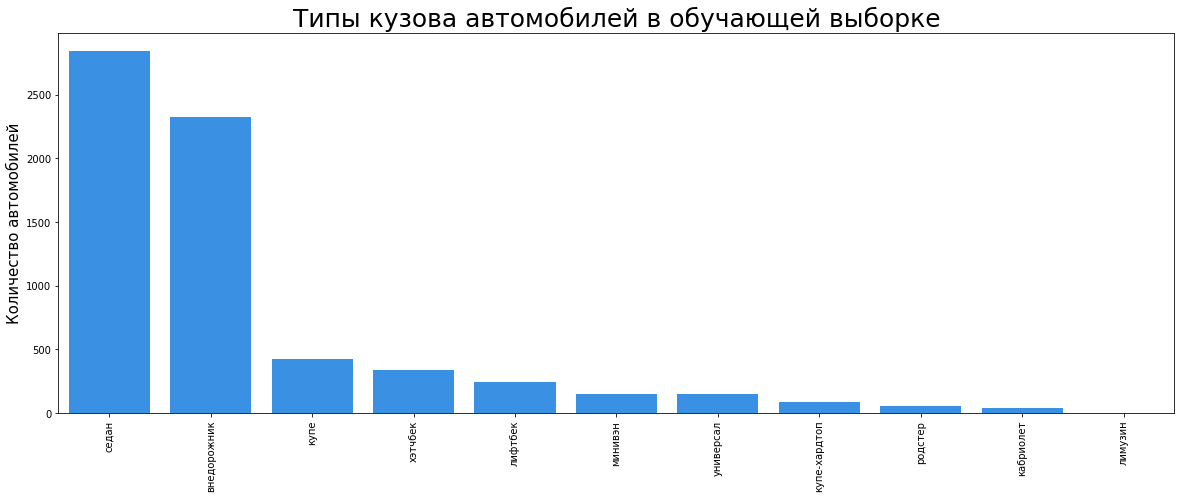

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Типы кузова автомобилей в обучающей выборке', fontsize=FONT_TITLE)
sns.countplot(x='bodyType', data=df_train,  color=COLOR,
              order=df_train['bodyType'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Количество автомобилей', fontsize=FONT_LABEL)
plt.xlabel('')
plt.show()

### brand

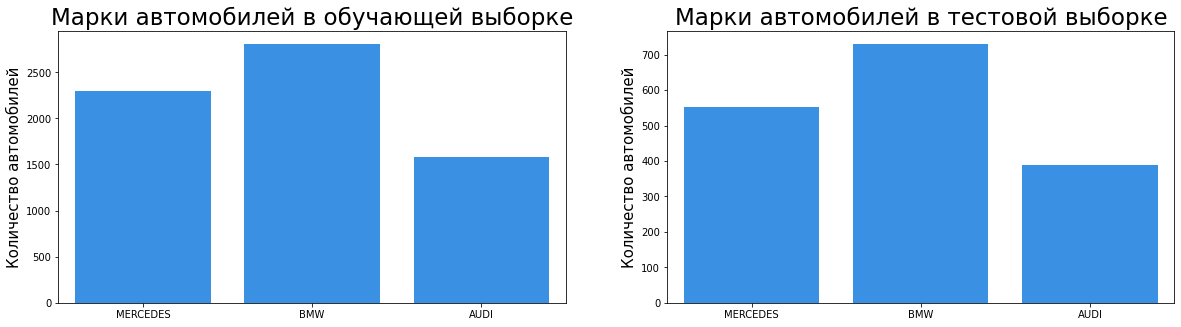

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

ax[0].set_title('Марки автомобилей в обучающей выборке', fontsize=FONT_TITLE-2)
sns.countplot(ax=ax[0], x='brand', data=df_train,  color=COLOR, order=df_test['brand'].unique())
ax[0].set_ylabel('Количество автомобилей', fontsize=FONT_LABEL)
ax[0].set_xlabel('')

ax[1].set_title('Марки автомобилей в тестовой выборке', fontsize=FONT_TITLE-2)
sns.countplot(ax=ax[1], x='brand', data=df_test,  color=COLOR, order=df_test['brand'].unique())
ax[1].set_ylabel('Количество автомобилей', fontsize=FONT_LABEL)
ax[1].set_xlabel('')


# plt.xticks(rotation=90)
# plt.ylabel('Количество объявлений', fontsize=FONT_LABEL)
# plt.xlabel('')
plt.show()

В выборках представлено 3 марки автомобилей, распределение внутри выборок не очень равномерное, но очень сильных перекосов нет. Между выборками соотношение  распределено одинаково. 

### model_info

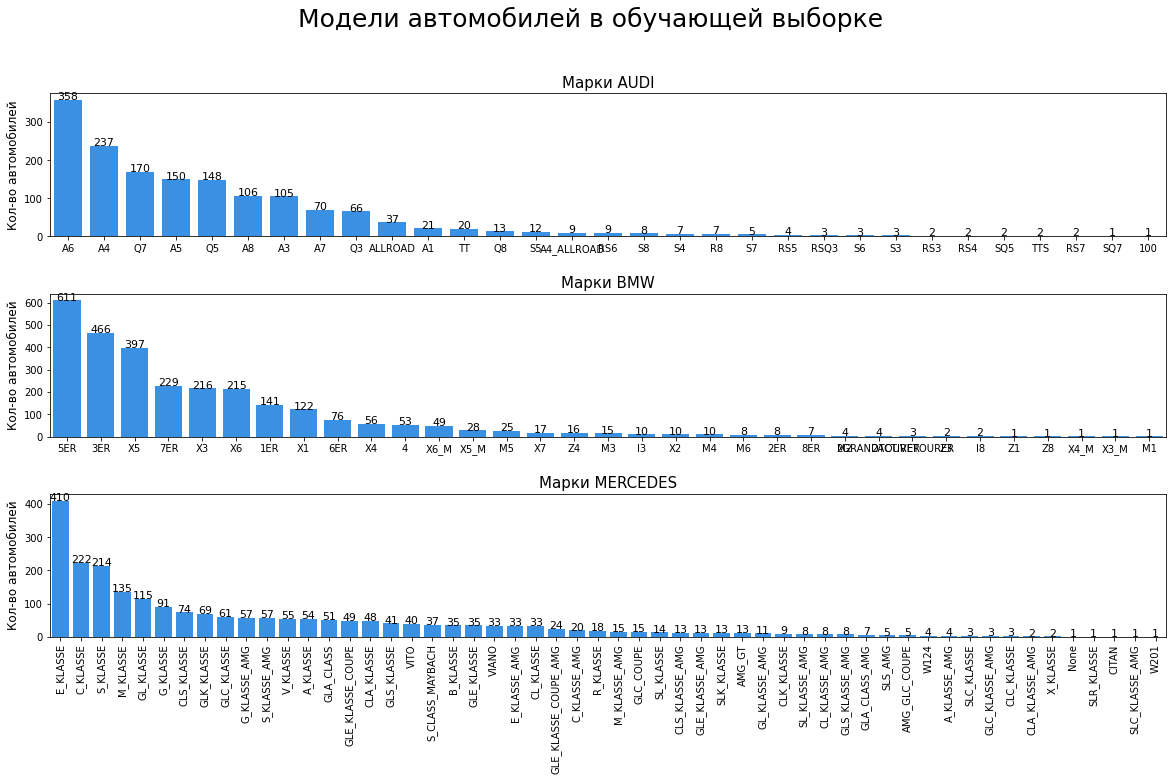

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(20,10))
plt.subplots_adjust(wspace=0.1, hspace=0.4) # Расстояния между графиками
fig.suptitle('Модели автомобилей в обучающей выборке', y=1.0, fontsize=FONT_TITLE)

ax[0].set_title('Марки AUDI', fontsize=FONT_LABEL)
sns.countplot(ax=ax[0], x='model_info', data=df_train[df_train['brand']=='AUDI'],  color=COLOR, 
              order=df_train[df_train['brand']=='AUDI']['model_info'].value_counts().index)
ax[0].set_ylabel('Кол-во автомобилей', fontsize=FONT_LABEL-3)
ax[0].set_xlabel('')
for rect in ax[0].patches:
    ax[0].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(),horizontalalignment='center', fontsize = 11)

ax[1].set_title('Марки BMW', fontsize=FONT_LABEL)
sns.countplot(ax=ax[1], x='model_info', data=df_train[df_train['brand']=='BMW'],  color=COLOR, 
              order=df_train[df_train['brand']=='BMW']['model_info'].value_counts().index)
ax[1].set_ylabel('Кол-во автомобилей', fontsize=FONT_LABEL-3)
ax[1].set_xlabel('')
for rect in ax[1].patches:
    ax[1].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(),horizontalalignment='center', fontsize = 11)

ax[2].set_title('Марки MERCEDES', fontsize=FONT_LABEL)
sns.countplot(ax=ax[2], x='model_info', data=df_train[df_train['brand']=='MERCEDES'],  color=COLOR, 
              order=df_train[df_train['brand']=='MERCEDES']['model_info'].value_counts().index)
ax[2].set_ylabel('Кол-во автомобилей', fontsize=FONT_LABEL-3)
ax[2].set_xlabel('')
plt.xticks(rotation=90)
for rect in ax[2].patches:
    ax[2].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(),horizontalalignment='center', fontsize = 11)

plt.show()

In [ ]:
# Есть 4 модели в тестовой выборке, которые отсутвуют в обучающей
set(df_test['model_info'].unique()) - set(df_train['model_info'].unique())

{'COUPE', 'SLK_KLASSE_AMG', 'W123', 'Z3M'}

Распределение моделей между выборками очень неравномерное. Популярных моделей гораздо больше. 

Так же в тестовой выборе присутсвуют 4 модели, которых нет в обучающей. Надо будет учесть это при построении моделей машинного обучения и нейросетей.

### brand_model

Создадим новый признак бренд - модель

In [ ]:
df_train['brand_model'] = df_train['brand'] + ' ' + df_train['model_info']
df_test['brand_model'] = df_test['brand'] + ' ' + df_test['model_info']


### color

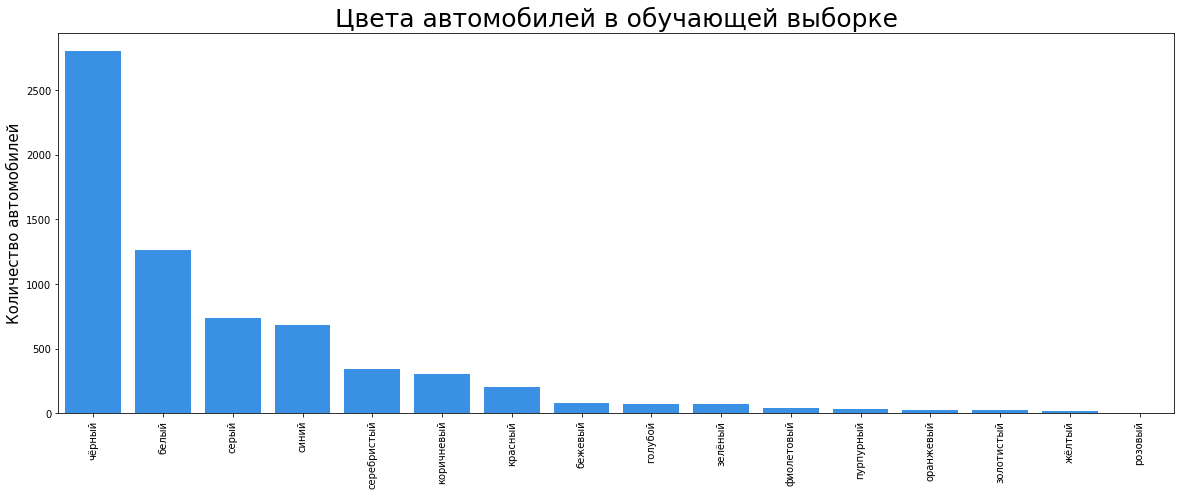

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Цвета автомобилей в обучающей выборке', fontsize=FONT_TITLE)
sns.countplot(x='color', data=df_train,  color=COLOR,
              order=df_train['color'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Количество автомобилей', fontsize=FONT_LABEL)
plt.xlabel('')

plt.show()

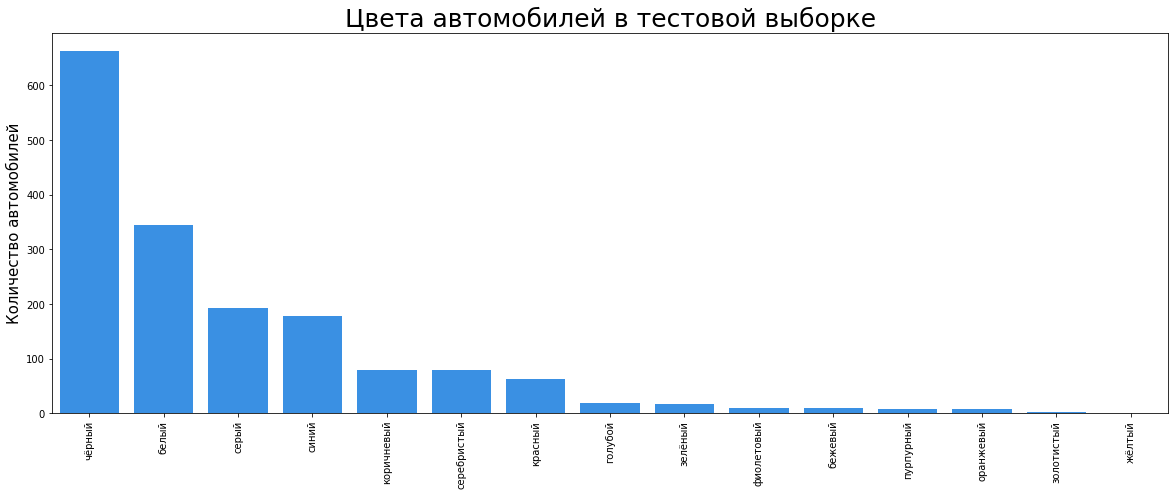

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Цвета автомобилей в тестовой выборке', fontsize=FONT_TITLE)
sns.countplot(x='color', data=df_test,  color=COLOR,
              order=df_test['color'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Количество автомобилей', fontsize=FONT_LABEL)
plt.xlabel('')
plt.show()


Больше всего черных автомобилей, затем белых и далее серых. Это категориальные признаки и для модели МЛ придется делать кучу дополнительных столбцов с большим количеством 0.

Сделаем дополнительный столбец 'color_littel', в которм серый и серебристый объединим, а все цветные, кроме синиго объединим в принак цветной

In [ ]:
def color_processing(color):
  if color in ['чёрный','серый', 'белый', 'синий']:
      return color
  elif color == 'серебристый':
      return 'серый'
  else:
      return 'цветной'

df_train['color_littel'] = df_train['color'].apply(lambda color: color_processing(color))
df_test['color_littel'] = df_test['color'].apply(lambda color: color_processing(color))

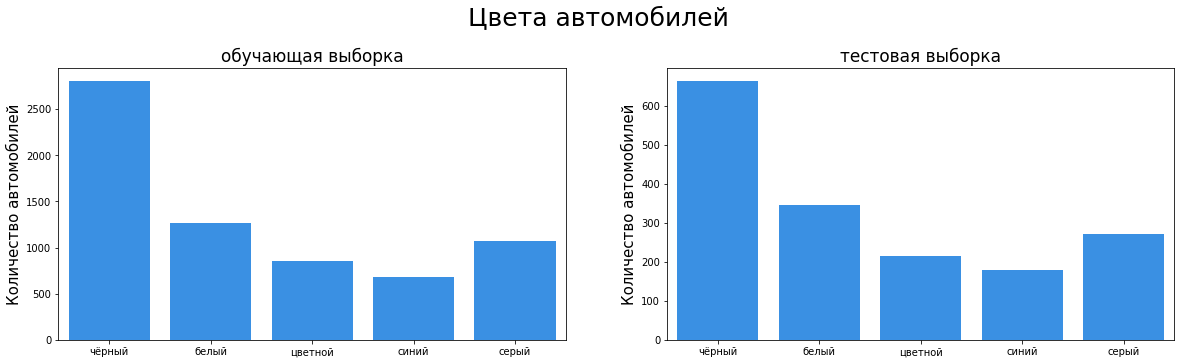

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
plt.subplots_adjust(wspace=0.2, hspace=0.4) # Расстояния между графиками
fig.suptitle('Цвета автомобилей', y=1.05, fontsize=FONT_TITLE)

ax[0].set_title('обучающая выборка', fontsize=FONT_LABEL+2)
sns.countplot(ax=ax[0], x='color_littel', data=df_train,  color=COLOR, order=df_test['color_littel'].unique())
ax[0].set_ylabel('Количество автомобилей', fontsize=FONT_LABEL)
ax[0].set_xlabel('')

ax[1].set_title('тестовая выборка', fontsize=FONT_LABEL+2)
sns.countplot(ax=ax[1], x='color_littel', data=df_test,  color=COLOR, order=df_test['color_littel'].unique())
ax[1].set_ylabel('Количество автомобилей', fontsize=FONT_LABEL)
ax[1].set_xlabel('')

plt.show()

### engineDisplacement

In [ ]:
df_train[df_train['engineDisplacement'] == 'undefined LTR']

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,...,sell_id,vehicleConfiguration,vehicleTransmission,Владельцы,Владение,ПТС,Привод,Руль,brand_model,color_littel
2296,хэтчбек,BMW,чёрный,"Автомобиль в наличии Москве , с ПТС , производ...",undefined LTR,184 N12,электро,9000,2017,I3,...,1100083262,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,NaN,Оригинал,задний,Левый,BMW I3,чёрный
3725,хэтчбек,BMW,чёрный,"BMW i3 Электромобиль с бензиновым генератором,...",undefined LTR,170 N12,электро,39500,2017,I3,...,1098041130,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,2 года и 11 месяцев,Оригинал,задний,Левый,BMW I3,чёрный
3726,хэтчбек,BMW,голубой,Прибыло из Америки в августе 20 года. Полная и...,undefined LTR,170 N12,электро,28800,2017,I3,...,1100097316,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,NaN,Оригинал,задний,Левый,BMW I3,цветной
5862,хэтчбек,BMW,белый,В наличии! Автомобиль куплен в США! Комплектац...,undefined LTR,170 N12,электро,35810,2013,I3,...,1100153696,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,NaN,Оригинал,задний,Левый,BMW I3,белый
6283,хэтчбек,BMW,чёрный,Авто в идеальном состоянии\nЕсть REX (range ex...,undefined LTR,170 N12,электро,60000,2013,I3,...,1097395090,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,NaN,Оригинал,задний,Левый,BMW I3,чёрный


У элетроавтомобилей нет объема двигателя. Заменим undefined LTR на 0.

In [ ]:
df_train['engineDisplacement'] = df_train['engineDisplacement'].apply(lambda e: 0 if e == 'undefined LTR' else e.replace(' LTR', '')).astype('float32')
df_test['engineDisplacement'] = df_test['engineDisplacement'].apply(lambda e: 0 if e == 'undefined LTR' else e.replace(' LTR', '')).astype('float32')

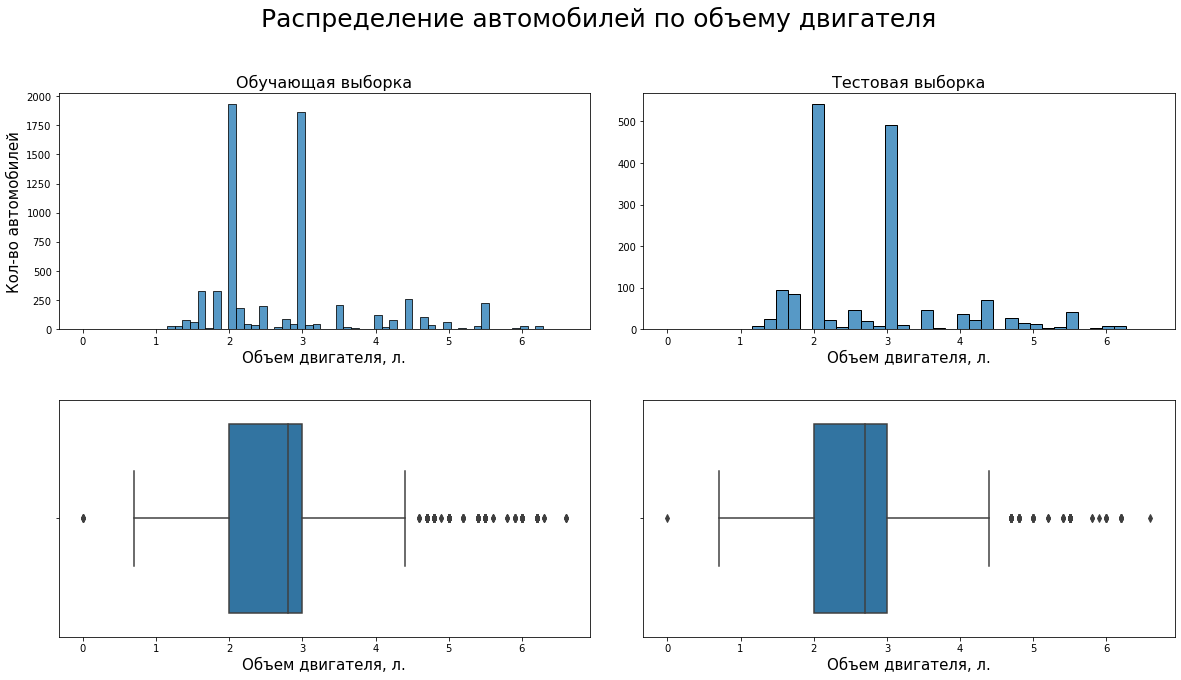

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
plt.subplots_adjust(wspace=0.1, hspace=0.3) # Расстояния между графиками
fig.suptitle('Распределение автомобилей по объему двигателя', y=1., fontsize=FONT_TITLE)

ax[0,0].set_title('Обучающая выборка', fontsize=FONT_LABEL+1)
sns.histplot(ax=ax[0,0], x='engineDisplacement', data=df_train)

ax[0,1].set_title('Тестовая выборка', fontsize=FONT_LABEL+1)
sns.histplot(ax=ax[0,1], x='engineDisplacement', data=df_test)

ax[0,0].set_ylabel('Кол-во автомобилей', fontsize=FONT_LABEL)
ax[0,1].set_ylabel('')

ax[0,0].set_xlabel('Объем двигателя, л.', fontsize=FONT_LABEL)
ax[0,1].set_xlabel('Объем двигателя, л.', fontsize=FONT_LABEL)

sns.boxplot(ax=ax[1,0], x='engineDisplacement', data=df_train)
sns.boxplot(ax=ax[1,1], x='engineDisplacement', data=df_test)
ax[1,0].set_xlabel('Объем двигателя, л.', fontsize=FONT_LABEL)
ax[1,1].set_xlabel('Объем двигателя, л.', fontsize=FONT_LABEL)

plt.show()

In [ ]:
df_train['engineDisplacement'].median(), df_test['engineDisplacement'].median()

(2.8, 2.7)

Больше всего автомобилей 2 и 3 литра. Распределение вухгорбое. Медианное значение 2,8 и 2.7.

### enginePower

In [ ]:
df_train['enginePower'] = df_train['enginePower'].apply(lambda e: e.replace(' N12', '')).astype('int')
df_test['enginePower'] = df_test['enginePower'].apply(lambda e: e.replace(' N12', '')).astype('int')

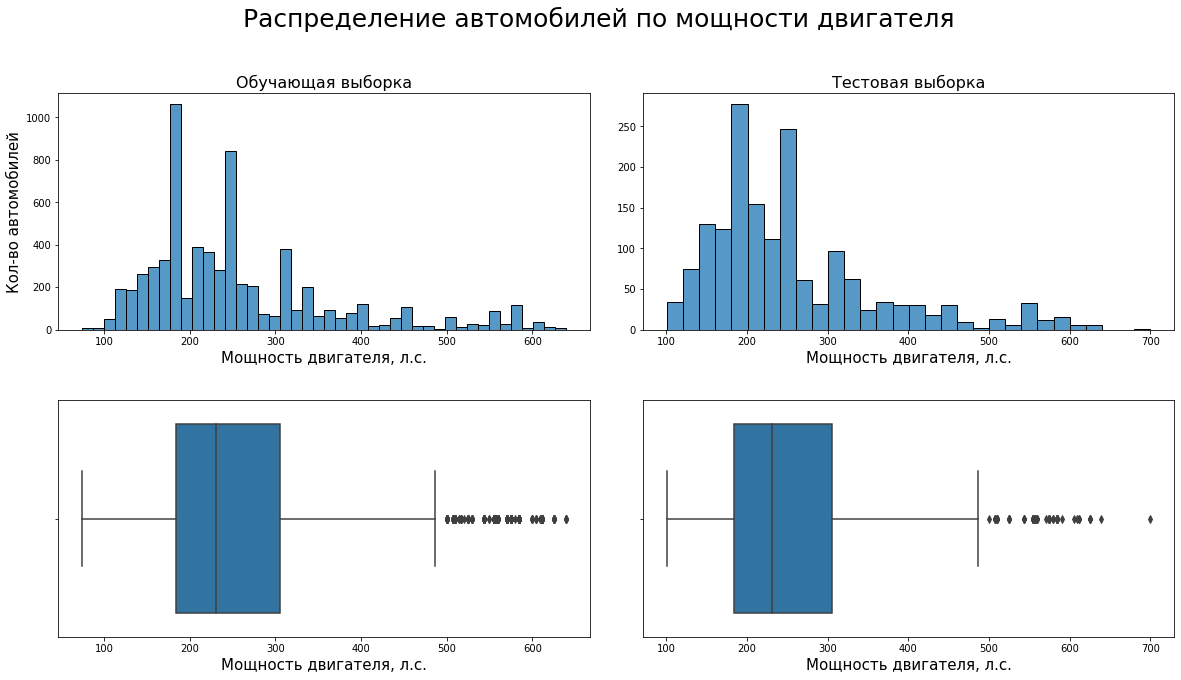

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
plt.subplots_adjust(wspace=0.1, hspace=0.3) # Расстояния между графиками
fig.suptitle('Распределение автомобилей по мощности двигателя', y=1., fontsize=FONT_TITLE)

ax[0,0].set_title('Обучающая выборка', fontsize=FONT_LABEL+1)
sns.histplot(ax=ax[0,0], x='enginePower', data=df_train)

ax[0,1].set_title('Тестовая выборка', fontsize=FONT_LABEL+1)
sns.histplot(ax=ax[0,1], x='enginePower', data=df_test)

ax[0,0].set_ylabel('Кол-во автомобилей', fontsize=FONT_LABEL)
ax[0,1].set_ylabel('')

ax[0,0].set_xlabel('Мощность двигателя, л.с.', fontsize=FONT_LABEL)
ax[0,1].set_xlabel('Мощность двигателя, л.с.', fontsize=FONT_LABEL)

sns.boxplot(ax=ax[1,0], x='enginePower', data=df_train)
sns.boxplot(ax=ax[1,1], x='enginePower', data=df_test)

ax[1,0].set_xlabel('Мощность двигателя, л.с.', fontsize=FONT_LABEL)
ax[1,1].set_xlabel('Мощность двигателя, л.с.', fontsize=FONT_LABEL)

plt.show()

In [ ]:
df_train['enginePower'].median(), df_test['enginePower'].median()

(231.0, 231.0)

Рапроеделение по гистограмме у мощности намного лучше. Медианные значения на обучающей и тестовой выборке свпадают.

В объеме и мощности двигателя присутсвуют аномально высокие значения.

Распределение мощности двигателя более подходит для логарифмирования. Прологарифмируем его и посмотрим, что получиться.


In [ ]:
df_train['enginePower_log'] = np.log(df_train['enginePower'])
df_test['enginePower_log'] = np.log(df_test['enginePower'])

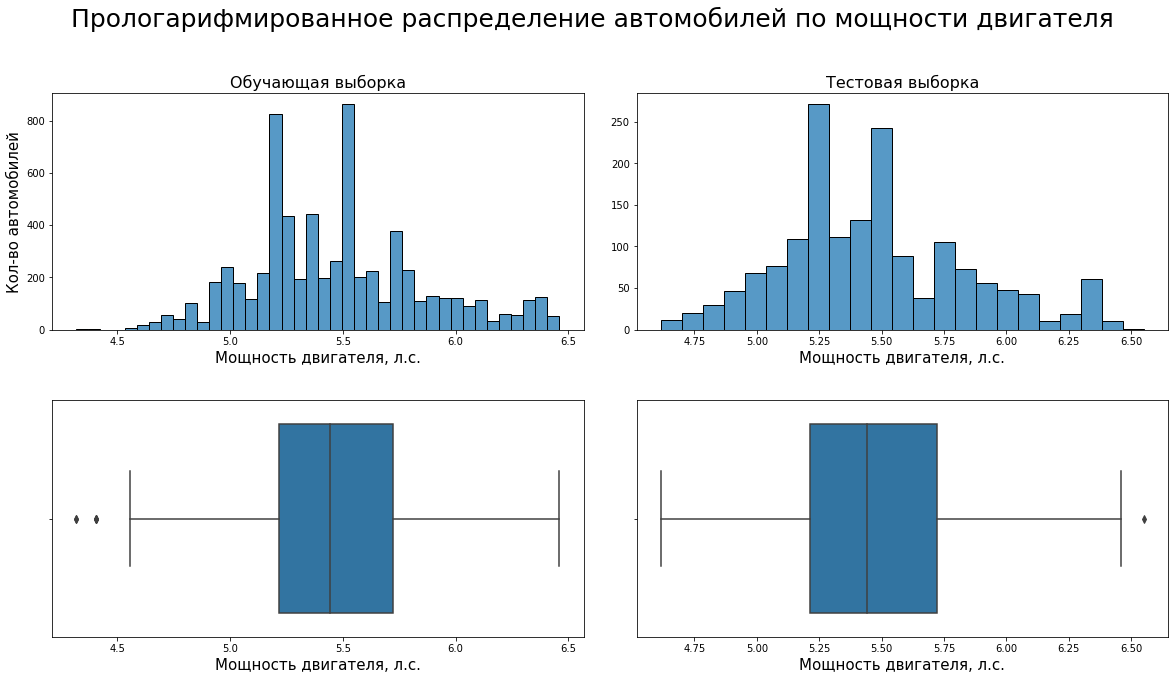

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
plt.subplots_adjust(wspace=0.1, hspace=0.3) # Расстояния между графиками
fig.suptitle('Прологарифмированное распределение автомобилей по мощности двигателя', y=1., fontsize=FONT_TITLE)

ax[0,0].set_title('Обучающая выборка', fontsize=FONT_LABEL+1)
sns.histplot(ax=ax[0,0], x='enginePower_log', data=df_train)

ax[0,1].set_title('Тестовая выборка', fontsize=FONT_LABEL+1)
sns.histplot(ax=ax[0,1], x='enginePower_log', data=df_test)

ax[0,0].set_ylabel('Кол-во автомобилей', fontsize=FONT_LABEL)
ax[0,1].set_ylabel('')

ax[0,0].set_xlabel('Мощность двигателя, л.с.', fontsize=FONT_LABEL)
ax[0,1].set_xlabel('Мощность двигателя, л.с.', fontsize=FONT_LABEL)

sns.boxplot(ax=ax[1,0], x='enginePower_log', data=df_train)
sns.boxplot(ax=ax[1,1], x='enginePower_log', data=df_test)

ax[1,0].set_xlabel('Мощность двигателя, л.с.', fontsize=FONT_LABEL)
ax[1,1].set_xlabel('Мощность двигателя, л.с.', fontsize=FONT_LABEL)

plt.show()

### взаимосвязь enginePower и engineDisplacement

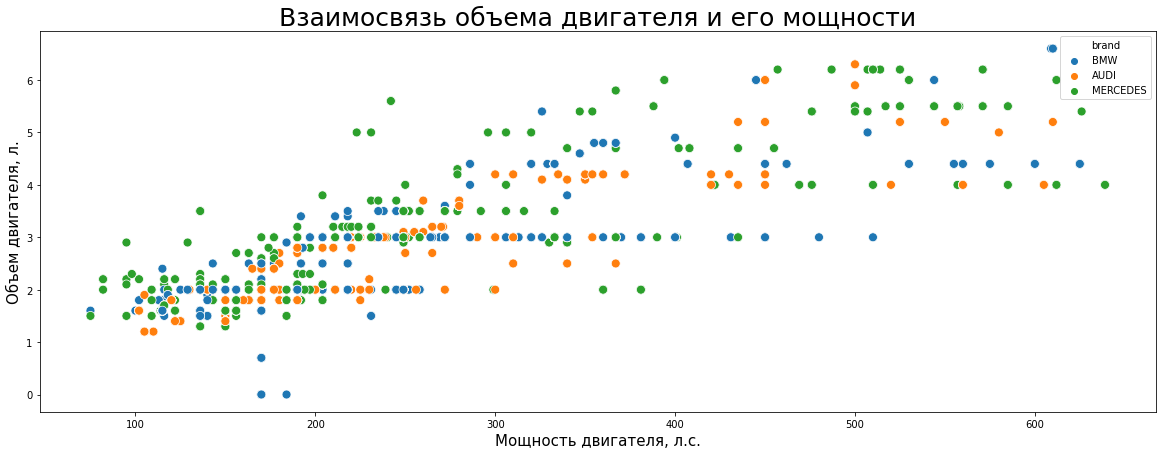

In [ ]:
plt.figure(figsize=(20, 7))
plt.title('Взаимосвязь объема двигателя и его мощности', fontsize=FONT_TITLE)
sns.scatterplot(data=df_train, x="enginePower", y="engineDisplacement", hue='brand', s=80)
plt.xlabel('Мощность двигателя, л.с.', fontsize=FONT_LABEL)
plt.ylabel('Объем двигателя, л.', fontsize=FONT_LABEL)
plt.show()

In [ ]:
df_train[['enginePower', 'engineDisplacement']].corr()

,enginePower,engineDisplacement
enginePower,1.00,0.86
engineDisplacement,0.86,1.00


Мощность двигателя линейно зависит (положительно) от его объема. Что и видно из графика scatterplot и матрицы корреляции, положительная выскокая корреляция. 





### fuelType

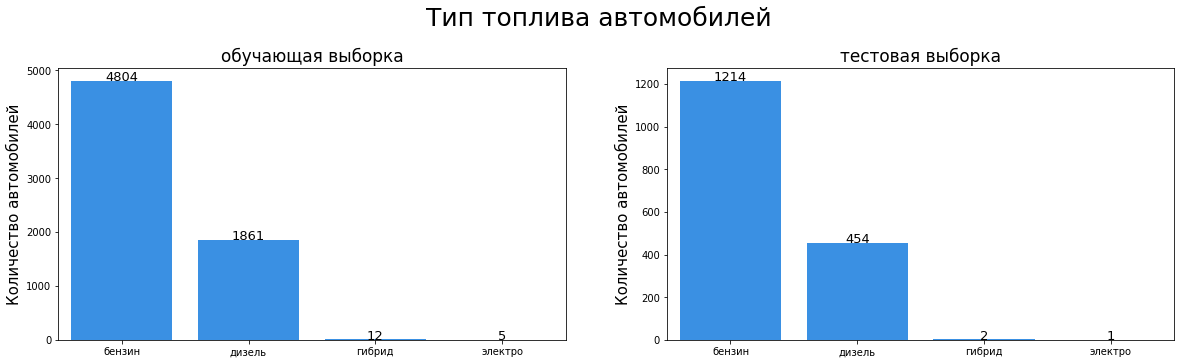

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
plt.subplots_adjust(wspace=0.2, hspace=0.4) # Расстояния между графиками
fig.suptitle('Тип топлива автомобилей', y=1.05, fontsize=FONT_TITLE)

ax[0].set_title('обучающая выборка', fontsize=FONT_LABEL+2)
sns.countplot(ax=ax[0], x='fuelType', data=df_train,  color=COLOR, order=df_test['fuelType'].unique())
ax[0].set_ylabel('Количество автомобилей', fontsize=FONT_LABEL)
ax[0].set_xlabel('')
for rect in ax[0].patches:
    ax[0].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 13)

ax[1].set_title('тестовая выборка', fontsize=FONT_LABEL+2)
sns.countplot(ax=ax[1], x='fuelType', data=df_test,  color=COLOR, order=df_test['fuelType'].unique())
ax[1].set_ylabel('Количество автомобилей', fontsize=FONT_LABEL)
ax[1].set_xlabel('')
for rect in ax[1].patches:
    ax[1].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(),horizontalalignment='center', fontsize = 13)


plt.show()

Очень мало объявлений автомобилей с типом топлива гибрид и электро. Так как это признак категориальный, то можно объединить эти виды топлива в один - другое

In [ ]:
def fuelType_processing(fuelType):
  if fuelType in ['бензин','дизель']:
      return fuelType
  else:
      return 'другое'

df_train['fuelType_littel'] = df_train['fuelType'].apply(lambda fuelType: fuelType_processing(fuelType))
df_test['fuelType_littel'] = df_test['fuelType'].apply(lambda fuelType: fuelType_processing(fuelType))

### mileage

In [ ]:
df_train[['mileage']].describe()

,mileage
count,6682.00
mean,120522.61
std,81454.45
min,1.00
25%,59181.25
50%,111000.00
75%,168000.00
max,999999.00


In [ ]:
df_test[['mileage']].describe()

,mileage
count,1671.00
mean,119724.66
std,83467.24
min,1.00
25%,59373.00
50%,109000.00
75%,165375.50
max,1000000.00


Пробеги max	999_999.00 и max	1_000_000.00 не знаю на сколько реальны, но точно будут портить картину. Поставим отсечку по 95 квантилю.

In [ ]:
q99 = df_train['mileage'].quantile(0.99)

df_train['mileage_стоп_q99'] = df_train['mileage'].apply(lambda x: x if x < q99 else q99) 
df_test['mileage_стоп_q99'] = df_test['mileage'].apply(lambda x: x if x < q99 else q99)

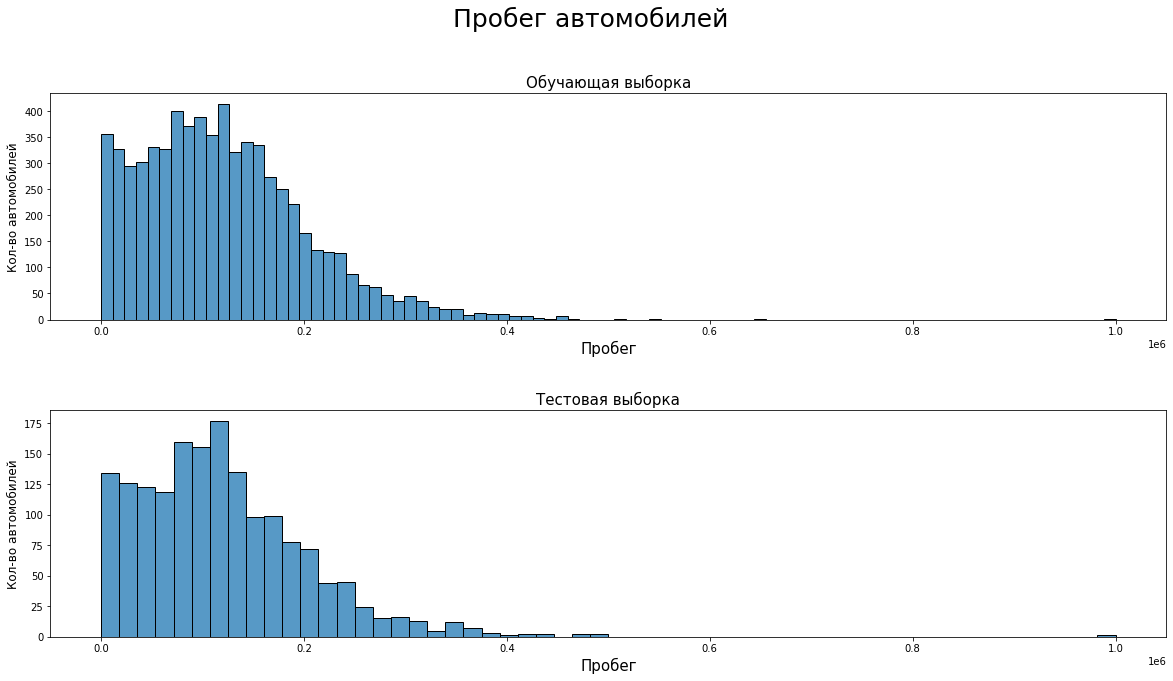

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
plt.subplots_adjust(wspace=0.1, hspace=0.4) # Расстояния между графиками
fig.suptitle('Пробег автомобилей', y=1.0, fontsize=FONT_TITLE)

ax[0].set_title('Обучающая выборка', fontsize=FONT_LABEL)
sns.histplot(ax=ax[0], x='mileage', data=df_train)
ax[0].set_ylabel('Кол-во автомобилей', fontsize=FONT_LABEL-3)
ax[0].set_xlabel('Пробег', fontsize=FONT_LABEL)

ax[1].set_title('Тестовая выборка', fontsize=FONT_LABEL)
sns.histplot(ax=ax[1], x='mileage', data=df_test)
ax[1].set_ylabel('Кол-во автомобилей', fontsize=FONT_LABEL-3)
ax[1].set_xlabel('Пробег', fontsize=FONT_LABEL)

plt.show()

Очень длинный хвост справа. Сделаем дополнительный признак - прологарифмируем пробег.

In [ ]:
df_train['mileage_log'] = np.log(df_train['mileage']+1)
df_test['mileage_log'] = np.log(df_test['mileage']+1)

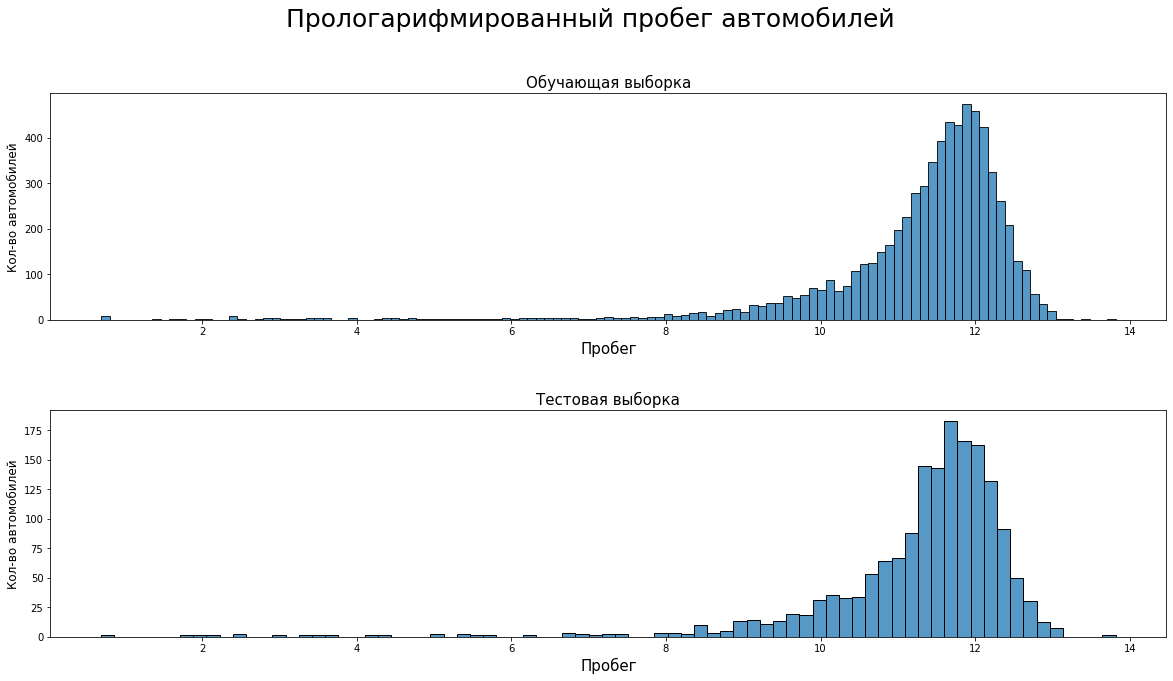

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
plt.subplots_adjust(wspace=0.1, hspace=0.4) # Расстояния между графиками
fig.suptitle('Прологарифмированный пробег автомобилей', y=1.0, fontsize=FONT_TITLE)

ax[0].set_title('Обучающая выборка', fontsize=FONT_LABEL)
sns.histplot(ax=ax[0], x='mileage_log', data=df_train)
ax[0].set_ylabel('Кол-во автомобилей', fontsize=FONT_LABEL-3)
ax[0].set_xlabel('Пробег', fontsize=FONT_LABEL)

ax[1].set_title('Тестовая выборка', fontsize=FONT_LABEL)
sns.histplot(ax=ax[1], x='mileage_log', data=df_test)
ax[1].set_ylabel('Кол-во автомобилей', fontsize=FONT_LABEL-3)
ax[1].set_xlabel('Пробег', fontsize=FONT_LABEL)

plt.show()

Гистограмма просто отобразилась по горизонтали. Лучше не стало. Но оставим этот признак, посмотрим с каким будет модель давать лучше результат.

### modelDate и productionDate - их взаимосвязь

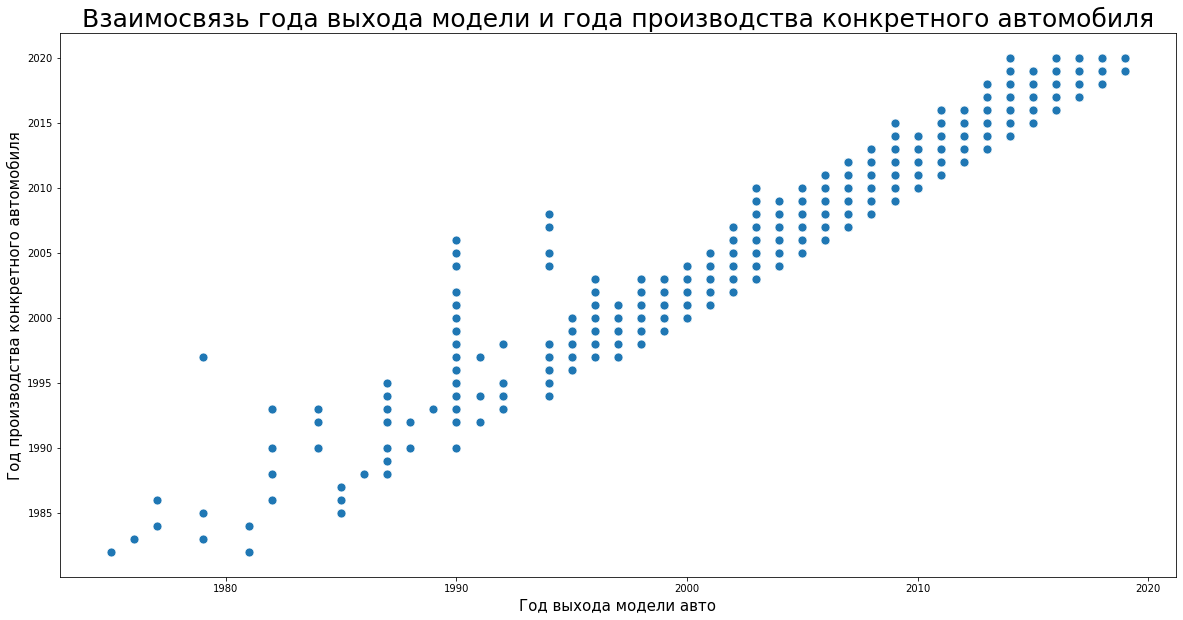

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Взаимосвязь года выхода модели и года производства конкретного автомобиля', fontsize=FONT_TITLE)
sns.scatterplot(data=df_train, x="modelDate", y="productionDate", s=80)
plt.xlabel('Год выхода модели авто', fontsize=FONT_LABEL)
plt.ylabel('Год производства конкретного автомобиля', fontsize=FONT_LABEL)

plt.show()

In [ ]:
df_train[['modelDate', 'productionDate']].corr()

,modelDate,productionDate
modelDate,1.00,0.96
productionDate,0.96,1.00


Связь между этими признаками линейная и очень сильно скоррелированная. Очень хорошо видно, что одна модель автомобиля производиться по несколько лет.   
Необходимо выбрать один. Для покупателя важет возраст самого автомобиля, а не когда начала выпускаться эта модель. 

Оставим признак productionDate, а modelDate - удалим.

In [ ]:
df_train = df_train.drop('modelDate', axis=1)
df_test = df_test.drop('modelDate', axis=1)

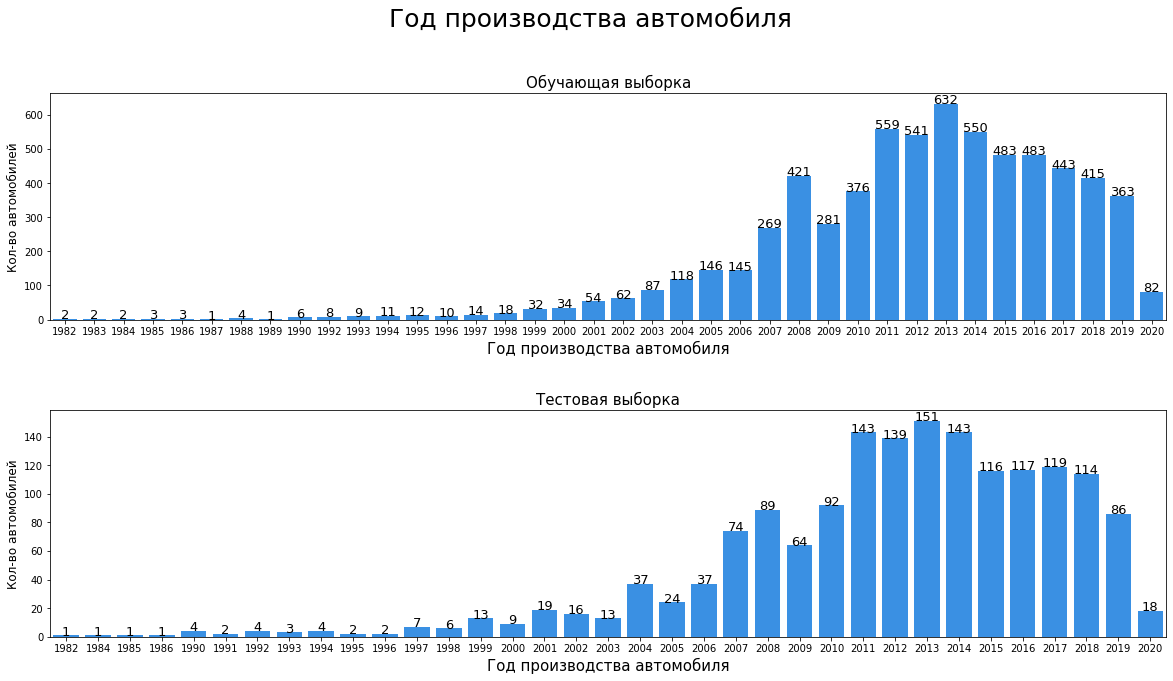

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
plt.subplots_adjust(wspace=0.1, hspace=0.4) # Расстояния между графиками
fig.suptitle('Год производства автомобиля', y=1.0, fontsize=FONT_TITLE)

ax[0].set_title('Обучающая выборка', fontsize=FONT_LABEL)
sns.countplot(ax=ax[0], x='productionDate', data=df_train, color=COLOR)
ax[0].set_ylabel('Кол-во автомобилей', fontsize=FONT_LABEL-3)
ax[0].set_xlabel('Год производства автомобиля', fontsize=FONT_LABEL)
for rect in ax[0].patches:
    ax[0].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(),horizontalalignment='center', fontsize = 13)

ax[1].set_title('Тестовая выборка', fontsize=FONT_LABEL)
sns.countplot(ax=ax[1], x='productionDate', data=df_test, color=COLOR)
ax[1].set_ylabel('Кол-во автомобилей', fontsize=FONT_LABEL-3)
ax[1].set_xlabel('Год производства автомобиля', fontsize=FONT_LABEL)
for rect in ax[1].patches:
    ax[1].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(),horizontalalignment='center', fontsize = 13)

plt.show()

В основном представлены к продаже автомобили с 2007 по 2019 года выпуска. Но есть единичные экземпляры очень старые. 

Создадим новый признак - возраст автомобиля (какой год ему идет, но еще не настал).

In [ ]:
# Будем отнимать от 2021, чтоб не было 0, так как возможно потом придется логарифмировать.
df_train['age_avto'] = 2021 - df_train['productionDate']
df_test['age_avto'] = 2021 - df_test['productionDate']

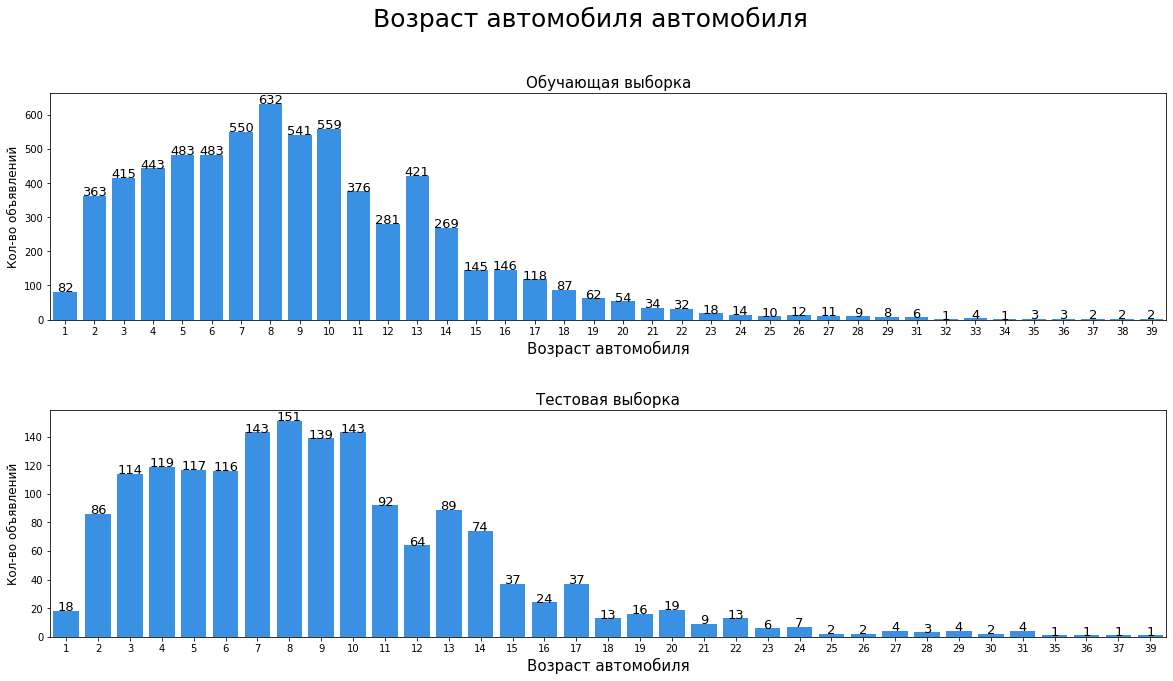

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
plt.subplots_adjust(wspace=0.1, hspace=0.4) # Расстояния между графиками
fig.suptitle('Возраст автомобиля автомобиля', y=1.0, fontsize=FONT_TITLE)

ax[0].set_title('Обучающая выборка', fontsize=FONT_LABEL)
sns.countplot(ax=ax[0], x='age_avto', data=df_train, color=COLOR)
ax[0].set_ylabel('Кол-во объявлений', fontsize=FONT_LABEL-3)
ax[0].set_xlabel('Возраст автомобиля', fontsize=FONT_LABEL)
for rect in ax[0].patches:
    ax[0].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(),horizontalalignment='center', fontsize = 13)

ax[1].set_title('Тестовая выборка', fontsize=FONT_LABEL)
sns.countplot(ax=ax[1], x='age_avto', data=df_test, color=COLOR)
ax[1].set_ylabel('Кол-во объявлений', fontsize=FONT_LABEL-3)
ax[1].set_xlabel('Возраст автомобиля', fontsize=FONT_LABEL)
for rect in ax[1].patches:
    ax[1].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(),horizontalalignment='center', fontsize = 13)

plt.show()

Очень длинный хвост. После 22 лет встречается очень мало автомобилей. Сделаем  по нему отсечку.

In [ ]:
df_train['age_avto_стоп_23'] = df_train['age_avto'].apply(lambda x: x if x < 23 else 23) 
df_test['age_avto_стоп_23'] = df_test['age_avto'].apply(lambda x: x if x < 23 else 23)

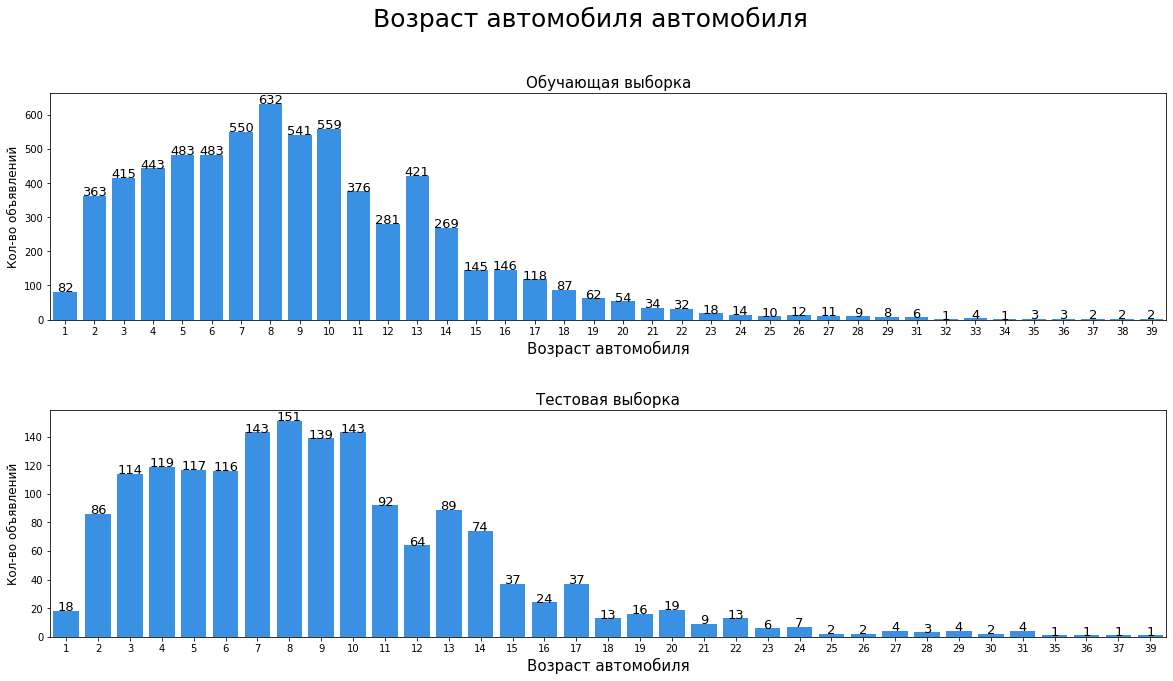

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
plt.subplots_adjust(wspace=0.1, hspace=0.4) # Расстояния между графиками
fig.suptitle('Возраст автомобиля автомобиля', y=1.0, fontsize=FONT_TITLE)

ax[0].set_title('Обучающая выборка', fontsize=FONT_LABEL)
sns.countplot(ax=ax[0], x='age_avto', data=df_train, color=COLOR)
ax[0].set_ylabel('Кол-во объявлений', fontsize=FONT_LABEL-3)
ax[0].set_xlabel('Возраст автомобиля', fontsize=FONT_LABEL)
for rect in ax[0].patches:
    ax[0].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(),horizontalalignment='center', fontsize = 13)

ax[1].set_title('Тестовая выборка', fontsize=FONT_LABEL)
sns.countplot(ax=ax[1], x='age_avto', data=df_test, color=COLOR)
ax[1].set_ylabel('Кол-во объявлений', fontsize=FONT_LABEL-3)
ax[1].set_xlabel('Возраст автомобиля', fontsize=FONT_LABEL)
for rect in ax[1].patches:
    ax[1].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(),horizontalalignment='center', fontsize = 13)

plt.show()

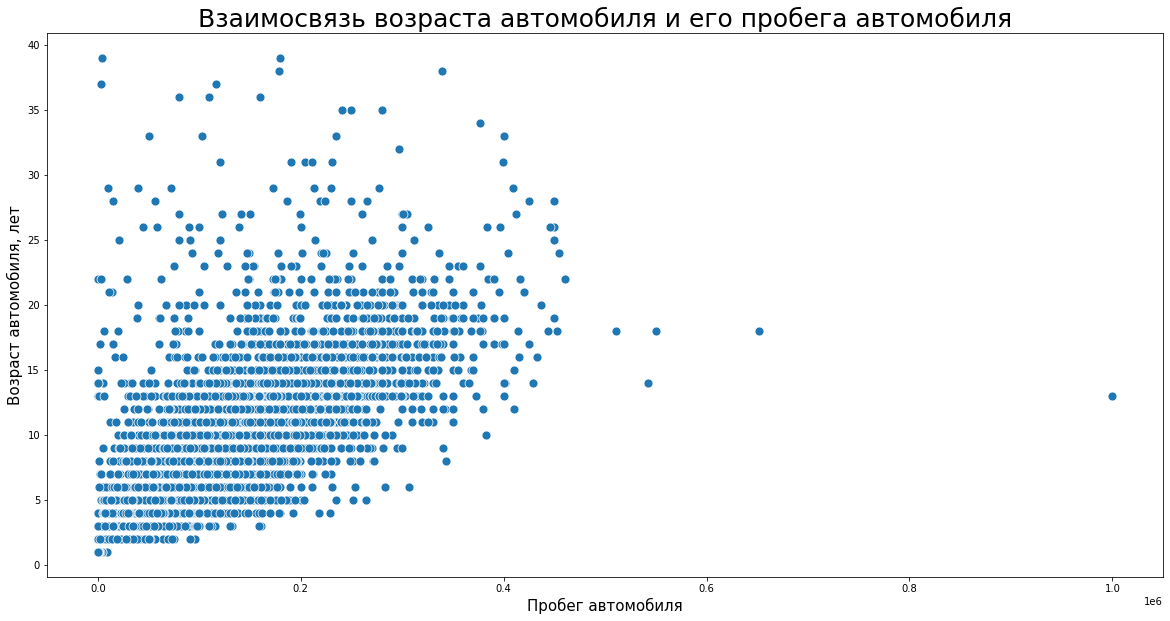

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Взаимосвязь возраста автомобиля и его пробега автомобиля', fontsize=FONT_TITLE)
sns.scatterplot(data=df_train, x="mileage", y="age_avto", s=80)
plt.xlabel('Пробег автомобиля', fontsize=FONT_LABEL)
plt.ylabel('Возраст автомобиля, лет', fontsize=FONT_LABEL)

plt.show()

In [ ]:
df_train[['mileage', 'age_avto']].corr()

,mileage,age_avto
mileage,1.00,0.71
age_avto,0.71,1.00


Есть линейная зависимость меджду этими признаками, но не такая большая.

**Сформируем признак среднегодовой пробег**

In [ ]:
df_train['mileage_/_age_avto'] = df_train['mileage'] / df_train['age_avto']
df_test['mileage_/_age_avto'] = df_test['mileage'] / df_test['age_avto'] 

### name

Данная колонка содержит сборную информацию, которая представлена в других колонках. Поэтому извлечем признак xDrive и после удалим.

In [ ]:
df_train['xDrive'] = df_train['name'].apply(lambda x: 1 if 'xDrive' in x else 0)
df_test['xDrive'] = df_test['name'].apply(lambda x: 1 if 'xDrive' in x else 0)

df_train = df_train.drop('name', axis=1)
df_test = df_test.drop('name', axis=1)

### numberOfDoors

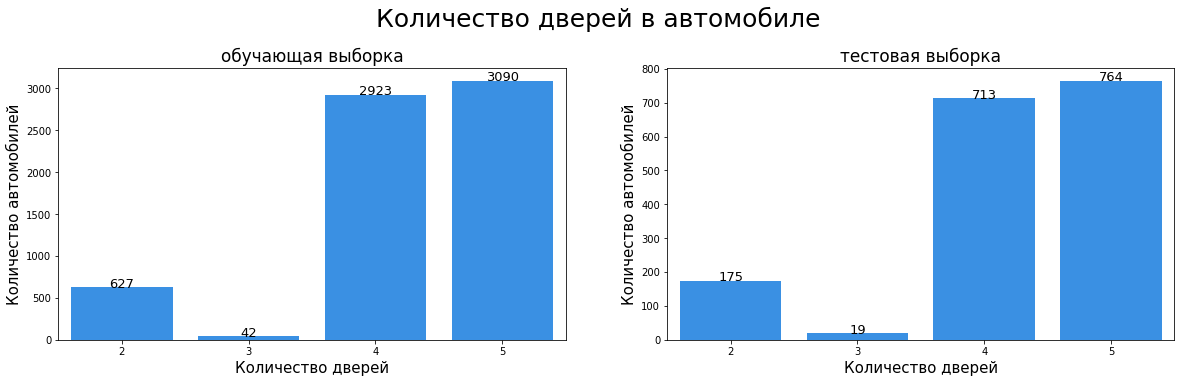

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
plt.subplots_adjust(wspace=0.2, hspace=0.4) # Расстояния между графиками
fig.suptitle('Количество дверей в автомобиле', y=1.05, fontsize=FONT_TITLE)

ax[0].set_title('обучающая выборка', fontsize=FONT_LABEL+2)
sns.countplot(ax=ax[0], x='numberOfDoors', data=df_train,  color=COLOR)
ax[0].set_ylabel('Количество автомобилей', fontsize=FONT_LABEL)
ax[0].set_xlabel('Количество дверей', fontsize=FONT_LABEL)
for rect in ax[0].patches:
    ax[0].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 13)

ax[1].set_title('тестовая выборка', fontsize=FONT_LABEL+2)
sns.countplot(ax=ax[1], x='numberOfDoors', data=df_test,  color=COLOR)
ax[1].set_ylabel('Количество автомобилей', fontsize=FONT_LABEL)
ax[1].set_xlabel('Количество дверей', fontsize=FONT_LABEL)
for rect in ax[1].patches:
    ax[1].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(),horizontalalignment='center', fontsize = 13)


plt.show()

Трехдверных автомобилей очень мало. Распределение между обучающей и тестовой выборкой пропорционально одинаково. 

### sell_id и vehicleConfiguration

sell_id - уникальный номер (id) объявления - нужет будет для нейронок (стыковка с изображениями)     
vehicleConfiguration - инвормация о типе кузова, трансмиссии и объеме двигаеля и количества дверей. Эти данные все есть в других колонках.  

Удалим vehicleConfiguration


In [ ]:
df_train = df_train.drop('vehicleConfiguration', axis=1)
df_test = df_test.drop('vehicleConfiguration', axis=1)

### vehicleTransmission

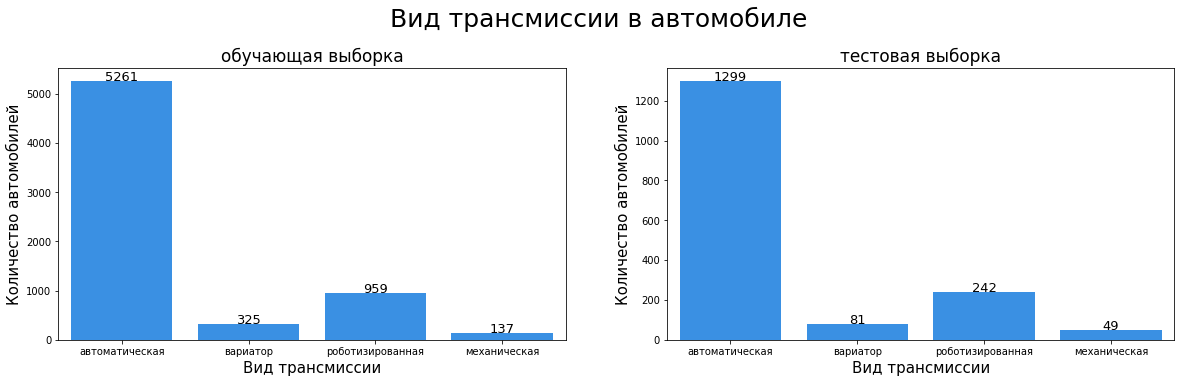

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
plt.subplots_adjust(wspace=0.2, hspace=0.4) # Расстояния между графиками
fig.suptitle('Вид трансмиссии в автомобиле', y=1.05, fontsize=FONT_TITLE)

ax[0].set_title('обучающая выборка', fontsize=FONT_LABEL+2)
sns.countplot(ax=ax[0], x='vehicleTransmission', data=df_train,  color=COLOR)
ax[0].set_ylabel('Количество автомобилей', fontsize=FONT_LABEL)
ax[0].set_xlabel('Вид трансмиссии', fontsize=FONT_LABEL)
for rect in ax[0].patches:
    ax[0].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 13)

ax[1].set_title('тестовая выборка', fontsize=FONT_LABEL+2)
sns.countplot(ax=ax[1], x='vehicleTransmission', data=df_test,  color=COLOR)
ax[1].set_ylabel('Количество автомобилей', fontsize=FONT_LABEL)
ax[1].set_xlabel('Вид трансмиссии', fontsize=FONT_LABEL)
for rect in ax[1].patches:
    ax[1].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(),horizontalalignment='center', fontsize = 13)


plt.show()

Больше всего в выборках автоматических коробок передачь. Они и в мире являются самыми распространенными.

### Владельцы и Владение

In [ ]:
df_train['Владельцы'].value_counts()

3 или более    2646
1 владелец     2029
2 владельца    2006
Name: Владельцы, dtype: int64

Необходимо преобразовать в числа, оставим только первый символ

In [ ]:
# Имеется один пропук, в описании не сказано сколько владельцев, но автомобиль во владении 10 лет и 7 месяцев, а год выпуска 2001.
# Заменим пропуск на 3. Да и их большенство (мода)
df_train[df_train['Владельцы'].isna()]

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,model_info,numberOfDoors,...,brand_model,color_littel,enginePower_log,fuelType_littel,mileage_стоп_q99,mileage_log,age_avto,age_avto_стоп_23,mileage_/_age_avto,xDrive
4994,седан,AUDI,чёрный,машина в идеале! вложено примерно 400тыс.руб \...,4.20,360,бензин,160000,S8,4,...,AUDI S8,чёрный,5.89,бензин,160000.00,11.98,20,20,8000.00,0


In [ ]:
df_train['Владельцы'] = df_train['Владельцы'].fillna('3 или более')

In [ ]:
df_train['Владельцы'] = df_train['Владельцы'].apply(lambda v: int(v[0]))
df_test['Владельцы'] = df_test['Владельцы'].apply(lambda v: int(v[0]))

df_train['Владельцы_кат'] = df_train['Владельцы'].apply(str)
df_test['Владельцы_кат'] = df_test['Владельцы'].apply(str)

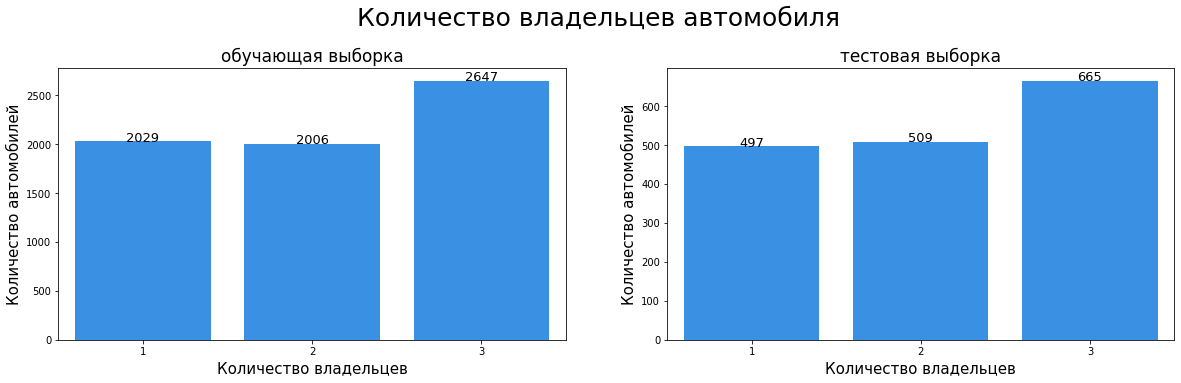

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
plt.subplots_adjust(wspace=0.2, hspace=0.4) # Расстояния между графиками
fig.suptitle('Количество владельцев автомобиля', y=1.05, fontsize=FONT_TITLE)

ax[0].set_title('обучающая выборка', fontsize=FONT_LABEL+2)
sns.countplot(ax=ax[0], x='Владельцы', data=df_train,  color=COLOR)
ax[0].set_ylabel('Количество автомобилей', fontsize=FONT_LABEL)
ax[0].set_xlabel('Количество владельцев', fontsize=FONT_LABEL)
for rect in ax[0].patches:
    ax[0].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 13)

ax[1].set_title('тестовая выборка', fontsize=FONT_LABEL+2)
sns.countplot(ax=ax[1], x='Владельцы', data=df_test,  color=COLOR)
ax[1].set_ylabel('Количество автомобилей', fontsize=FONT_LABEL)
ax[1].set_xlabel('Количество владельцев', fontsize=FONT_LABEL)
for rect in ax[1].patches:
    ax[1].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(),horizontalalignment='center', fontsize = 13)


plt.show()

In [ ]:
df_train['Владение'].isna().value_counts()

True     4326
False    2356
Name: Владение, dtype: int64

 Пропусков в два раза больше - данный столбец лучше удалить.

In [ ]:
df_train = df_train.drop('Владение', axis=1)
df_test = df_test.drop('Владение', axis=1)

### ПТС

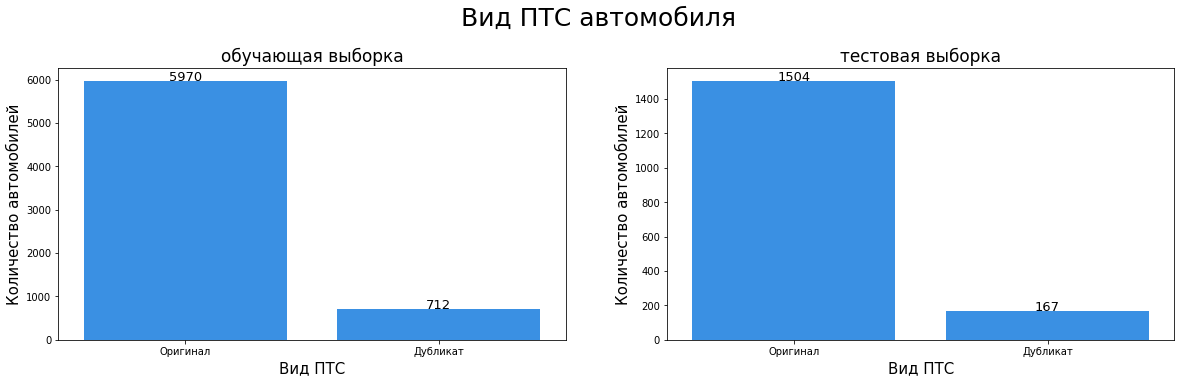

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
plt.subplots_adjust(wspace=0.2, hspace=0.4) # Расстояния между графиками
fig.suptitle('Вид ПТС автомобиля', y=1.05, fontsize=FONT_TITLE)

ax[0].set_title('обучающая выборка', fontsize=FONT_LABEL+2)
sns.countplot(ax=ax[0], x='ПТС', data=df_train,  color=COLOR)
ax[0].set_ylabel('Количество автомобилей', fontsize=FONT_LABEL)
ax[0].set_xlabel('Вид ПТС', fontsize=FONT_LABEL)
for rect in ax[0].patches:
    ax[0].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 13)

ax[1].set_title('тестовая выборка', fontsize=FONT_LABEL+2)
sns.countplot(ax=ax[1], x='ПТС', data=df_test,  color=COLOR)
ax[1].set_ylabel('Количество автомобилей', fontsize=FONT_LABEL)
ax[1].set_xlabel('Вид ПТС', fontsize=FONT_LABEL)
for rect in ax[1].patches:
    ax[1].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(),horizontalalignment='center', fontsize = 13)


plt.show()

Оригиналов ПДС намного больше. 

Можно попробовать сделать этот признак бинарный (1-оригинал, 0-дубликат) ипосмотреть какой будет лучше для модели машинного обучения. 

In [ ]:
df_train['ПТС_10'] = df_train['ПТС'].apply(lambda p: 1 if p=='Оригинал' else 0)
df_test['ПТС_10'] = df_test['ПТС'].apply(lambda p: 1 if p=='Оригинал' else 0)

### Привод

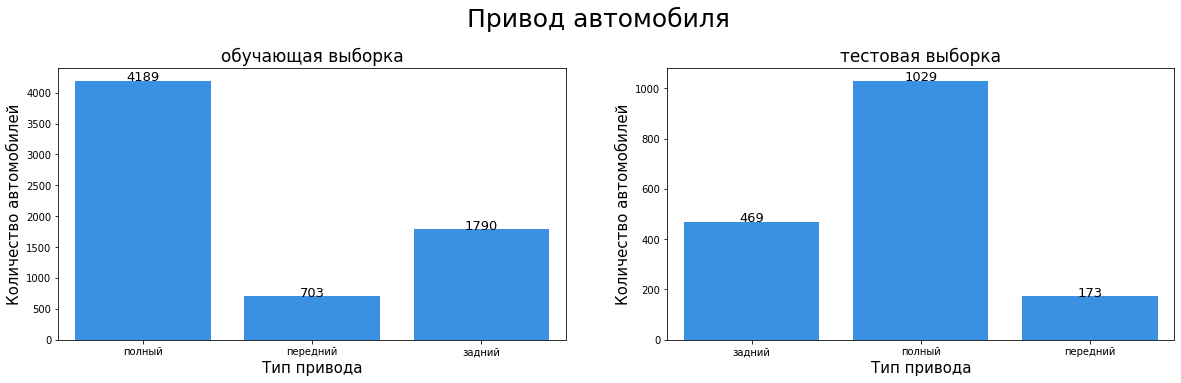

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
plt.subplots_adjust(wspace=0.2, hspace=0.4) # Расстояния между графиками
fig.suptitle('Привод автомобиля', y=1.05, fontsize=FONT_TITLE)

ax[0].set_title('обучающая выборка', fontsize=FONT_LABEL+2)
sns.countplot(ax=ax[0], x='Привод', data=df_train,  color=COLOR)
ax[0].set_ylabel('Количество автомобилей', fontsize=FONT_LABEL)
ax[0].set_xlabel('Тип привода', fontsize=FONT_LABEL)
for rect in ax[0].patches:
    ax[0].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 13)

ax[1].set_title('тестовая выборка', fontsize=FONT_LABEL+2)
sns.countplot(ax=ax[1], x='Привод', data=df_test,  color=COLOR)
ax[1].set_ylabel('Количество автомобилей', fontsize=FONT_LABEL)
ax[1].set_xlabel('Тип привода', fontsize=FONT_LABEL)
for rect in ax[1].patches:
    ax[1].text(rect.get_x()+rect.get_width()/2, rect.get_height(), rect.get_height(),horizontalalignment='center', fontsize = 13)


plt.show()

### Руль

In [ ]:
df_train['Руль'].value_counts()

Левый     6680
Правый       2
Name: Руль, dtype: int64

In [ ]:
df_test['Руль'].value_counts()

Левый    1671
Name: Руль, dtype: int64

В обучающей выборке всего 2 автомобиля с правым рулем, а все остальные с левым, а в тестовой выборке только с левым рулем. Этот признак  не являетсяя информативным.

Его удалим.

In [ ]:
df_train = df_train.drop('Руль', axis=1)
df_test = df_test.drop('Руль', axis=1)

### description

В этом признаке содержиться текст объявления, который написал владелец авто. 

Его будем использовать для нейросети и обработку будем делать, непосредсвенно, перед построением нейросети.

### price

Это таргет переменная, которую нам необходимо предсказать на тестовой выборке

In [ ]:
df_train[['price']].describe()

,price
count,6682.00
mean,1899868.12
std,1914153.12
min,301301.00
25%,800000.00
50%,1300000.00
75%,2299283.25
max,23900000.00


Разброс по ценам обчень большой. Есть анамальные значения - небольшое количество очень дорогих автомобилей.



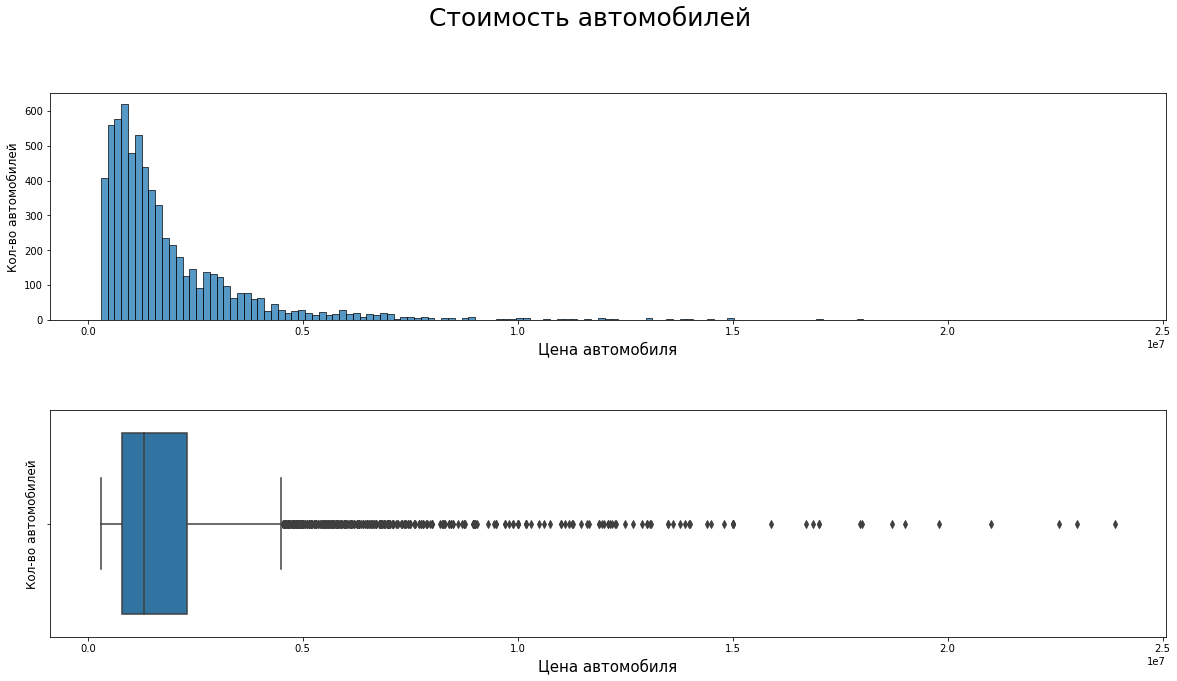

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
plt.subplots_adjust(wspace=0.1, hspace=0.4) # Расстояния между графиками
fig.suptitle('Стоимость автомобилей', y=1.0, fontsize=FONT_TITLE)

sns.histplot(ax=ax[0], x='price', data=df_train)
ax[0].set_ylabel('Кол-во автомобилей', fontsize=FONT_LABEL-3)
ax[0].set_xlabel('Цена автомобиля', fontsize=FONT_LABEL)

sns.boxplot(ax=ax[1], x='price', data=df_train)
ax[1].set_ylabel('Кол-во автомобилей', fontsize=FONT_LABEL-3)
ax[1].set_xlabel('Цена автомобиля', fontsize=FONT_LABEL)

plt.show()

Длинный хвост справа. Прологарифмируем данный признак и посмотрим, что получиться.

In [ ]:
df_train['price_log'] = np.log(df_train['price'])

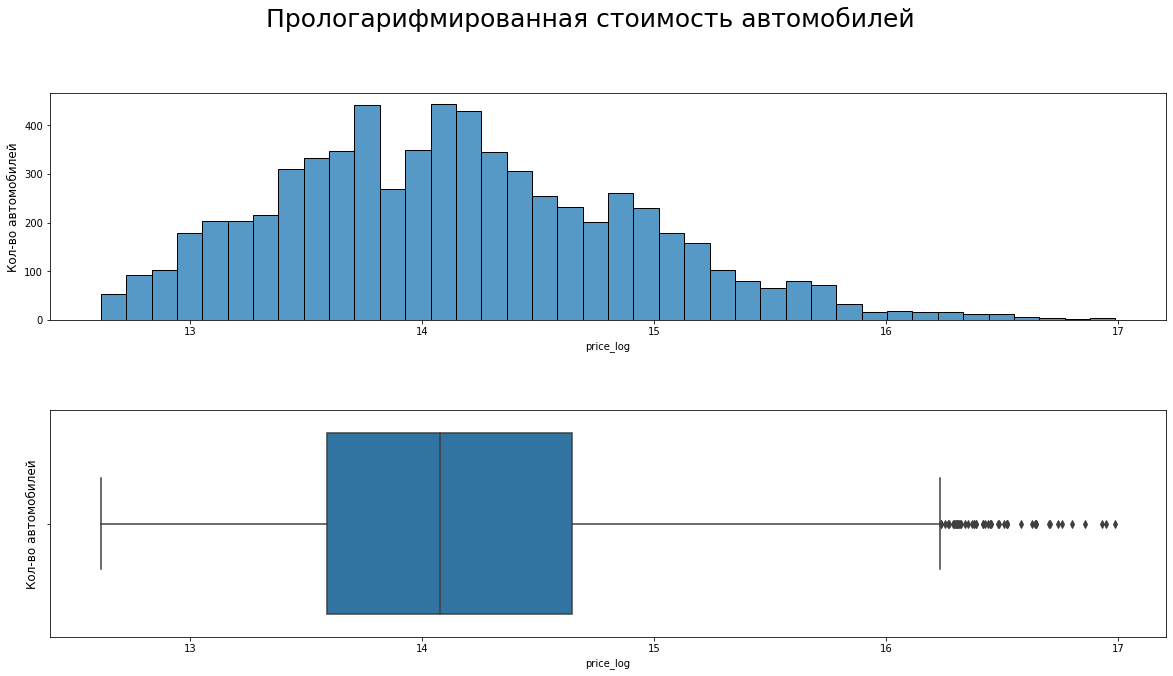

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
plt.subplots_adjust(wspace=0.1, hspace=0.4) # Расстояния между графиками
fig.suptitle('Прологарифмированная стоимость автомобилей', y=1.0, fontsize=FONT_TITLE)

sns.histplot(ax=ax[0], x='price_log', data=df_train)
ax[0].set_ylabel('Кол-во автомобилей', fontsize=FONT_LABEL-3)

sns.boxplot(ax=ax[1], x='price_log', data=df_train)
ax[1].set_ylabel('Кол-во автомобилей', fontsize=FONT_LABEL-3)


plt.show()

Распределение стало гораздо получше.

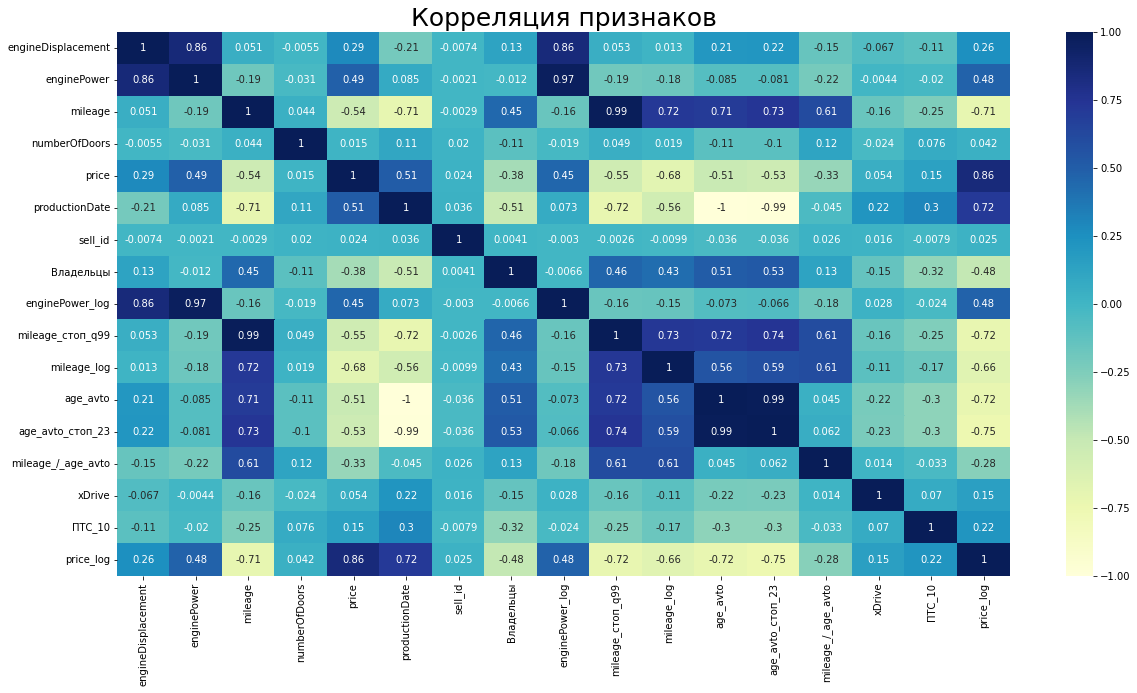

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Корреляция признаков', fontsize=FONT_TITLE)
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')
plt.xticks(rotation=90)
plt.show()

Стоимость логарифмированная коррелирует с пробегом, датой производства, и соответсвеннос с возрастом авто.

У простой стоимости эта связь менее выражена.

### Сохранение в файлы обработанных данных

In [ ]:
df_train.to_csv(path_data+'train_for_ML.csv', index=False)
df_test.to_csv(path_data+'test_for_ML.csv', index=False)

In [ ]:
df_train.sample(2).T

,4217,1125
bodyType,внедорожник,внедорожник
brand,AUDI,MERCEDES
color,чёрный,чёрный
description,Машина в отличном состоянии. Все подробности п...,На машине установлен оригинальный обвес и тюни...
engineDisplacement,3.00,5.50
enginePower,245,544
fuelType,дизель,бензин
mileage,83000,54194
model_info,Q7,G_KLASSE_AMG
numberOfDoors,5,5
